<a href="https://colab.research.google.com/github/theschool8/text-clasification/blob/main/News_Title_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
data = pd.read_excel('/content/drive/My Drive/Bagidata/News Title.xls', usecols=[1,2])
data.head(10)

,News Title,Category
0,Google+ rolls out 'Stories' for tricked out ph...,Technology
1,Dov Charney's Redeeming Quality,Business
2,White God adds Un Certain Regard to the Palm Dog,Entertainment
3,"Google shows off Androids for wearables, cars,...",Technology
4,China May new bank loans at 870.8 bln yuan,Business
5,Firefox Windows 8 Metro Browser Development Ca...,Technology
6,Destiny Beta Kicks Off In July,Technology
7,Apple & Google's Motorola end legal battle,Technology
8,UPDATE 2-Facebook Q1 revenue grows 72 percent ...,Business
9,"Selena Gomez, Justin Bieber Spotted at the Sam...",Entertainment


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Category')

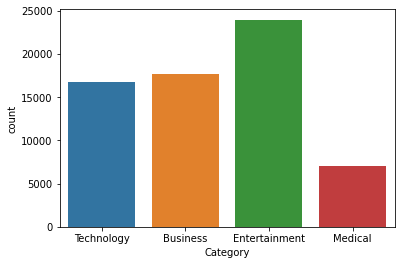

In [ ]:
sns.countplot('Category', data=data)
plt.xlabel('Category')

In [ ]:
category_index = pd.factorize(data['Category'])[1]
print(category_index)
category_num = pd.factorize(data['Category'])[0]
category_num

Index(['Technology', 'Business', 'Entertainment', 'Medical'], dtype='object')


array([0, 1, 2, ..., 2, 2, 1])

In [ ]:
title = data['News Title']
title[:10]

0    Google+ rolls out 'Stories' for tricked out ph...
1                      Dov Charney's Redeeming Quality
2     White God adds Un Certain Regard to the Palm Dog
3    Google shows off Androids for wearables, cars,...
4           China May new bank loans at 870.8 bln yuan
5    Firefox Windows 8 Metro Browser Development Ca...
6                       Destiny Beta Kicks Off In July
7           Apple & Google's Motorola end legal battle
8    UPDATE 2-Facebook Q1 revenue grows 72 percent ...
9    Selena Gomez, Justin Bieber Spotted at the Sam...
Name: News Title, dtype: object

In [ ]:
def PreProcess(list):
  post_data = []
  stemmer= PorterStemmer()
  stop_words = set(stopwords.words('english'))
  for line in list:
    # Case folding
    data = str(line).lower()
    # remove number 
    data = re.sub(r'\d+', '', data)
    # remove punctuation
    data = data.translate(str.maketrans({a:None for a in string.punctuation}))
    # remove double, triple, and so on space
    data = re.sub('\s+',' ', data)
    tokens = word_tokenize(data)
    stemmer_sentence = []
    for word in tokens:
      # remove stopwords
      if word not in stop_words :
      #lemmatization
        stemmer_word = stemmer.stem(word)
        stemmer_sentence.append(stemmer_word)
    data = ' '.join(stemmer_sentence)
    # append all 
    post_data.append(data)
  return post_data

In [ ]:
post_title = PreProcess(title)
post_title[:10]

['googl roll stori trick photo playback',
 'dov charney redeem qualiti',
 'white god add un certain regard palm dog',
 'googl show android wearabl car tv',
 'china may new bank loan bln yuan',
 'firefox window metro browser develop cancel mozilla',
 'destini beta kick juli',
 'appl googl motorola end legal battl',
 'updat facebook q revenu grow percent rise mobil ad',
 'selena gomez justin bieber spot record studio miami']

In [ ]:
tfidf = TfidfVectorizer(ngram_range=(1,2), min_df=10, max_features=3000)
X_tf = tfidf.fit_transform(post_title)
tf = pd.DataFrame(X_tf.toarray(), columns=tfidf.get_feature_names())
tf

,aaa,aaliyah,aapl,abandon,abbvi,abc,abort,abus,acceler,accept,access,accid,accord,account,accus,ackman,acquir,acquisit,across,act,action,activ,activist,actor,actress,actual,ad,adam,adapt,add,addit,address,administr,admit,adob,adopt,adult,advanc,advertis,advic,...,wors,worst,worth,would,wow,write,writer,wrong,wutang,wwdc,wwe,xbox,xbox one,xmen,xmen day,xmen director,xp,xperia,yahoo,ye,year,year ago,yearold,yellen,yen,yet,yield,york,youll,young,your,youtub,yuan,zac,zac efron,zendaya,zillow,zone,zoom,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.368501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.495935,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.329633,0.343891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65533,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Naive Bayes Classifier

In [ ]:
%%time 
X_train, X_test, y_train, y_test = train_test_split(tf, category_num, 
                                                    test_size = 0.3, 
                                                    random_state = 60)

# Train our model
nbc = MultinomialNB()
nbc.fit(X_train, y_train)
yhat_nbc = nbc.predict(X_test)
print("Training: \n", classification_report(y_train, nbc.predict(X_train)))
print("Testing: \n", classification_report(y_test, yhat_nbc))

Training: 
               precision    recall  f1-score   support

           0       0.86      0.85      0.85     11729
           1       0.85      0.87      0.86     12484
           2       0.92      0.95      0.93     16716
           3       0.92      0.78      0.84      4945

    accuracy                           0.89     45874
   macro avg       0.89      0.86      0.87     45874
weighted avg       0.89      0.89      0.88     45874

Testing: 
               precision    recall  f1-score   support

           0       0.85      0.84      0.84      5047
           1       0.83      0.86      0.85      5223
           2       0.91      0.94      0.93      7245
           3       0.90      0.75      0.82      2146

    accuracy                           0.87     19661
   macro avg       0.87      0.85      0.86     19661
weighted avg       0.87      0.87      0.87     19661

CPU times: user 2.2 s, sys: 1.24 s, total: 3.44 s
Wall time: 2.36 s


In [ ]:
def kfold_cv(n_kfold, X, y, model):
  cv = StratifiedKFold(n_splits=n_kfold, shuffle=False)
  i=1
  for train_idx, test_idx in cv.split(X, y):
    X_train, y_train = X[train_idx], y[train_idx]
    X_test, y_test = X[test_idx], y[test_idx]
    model.fit(X_train, y_train)
    accuracy_train = accuracy_score(y_train, model.predict(X_train))
    yhat = model.predict(X_test)
    accuracy_test = accuracy_score(y_test, yhat)
    f1 = f1_score(y_test, yhat, average='weighted')
    clt_test = pd.crosstab(yhat, y_test,  rownames=['Predicted'], 
                  colnames=['Actual'], margins=True)

    print ("------------------FOLD KE = {:.0f}-------------------".format(i))
    i=i+1
    print ("Accuracy Training = {:.4f}".format(accuracy_train))
    print ("Accuracy Testing = {:.4f}".format(accuracy_test))
    print ("F1 Score = {:.4f}".format(f1))
    print("Confusion Matrix: \n", clt_test)

In [ ]:
%%time
nbc = MultinomialNB()
kfold_cv(5, tf.values, category_num, nbc)

------------------FOLD KE = 1-------------------
Accuracy Training = 0.8835
Accuracy Testing = 0.8771
F1 Score = 0.8763
Confusion Matrix: 
 Actual        0     1     2     3    All
Predicted                               
0          2843   301   143    71   3358
1           314  3054    81   142   3591
2           164   140  4532   138   4974
3            35    46    36  1067   1184
All        3356  3541  4792  1418  13107
------------------FOLD KE = 2-------------------
Accuracy Training = 0.8841
Accuracy Testing = 0.8758
F1 Score = 0.8752
Confusion Matrix: 
 Actual        0     1     2     3    All
Predicted                               
0          2840   304   129    87   3360
1           333  3050   110   124   3617
2           143   135  4511   129   4918
3            39    53    42  1078   1212
All        3355  3542  4792  1418  13107
------------------FOLD KE = 3-------------------
Accuracy Training = 0.8844
Accuracy Testing = 0.8750
F1 Score = 0.8746
Confusion Matrix: 
 Actual

# Logistic Regression (One vs Rest)

In [ ]:
%%time
X_train, X_test, y_train, y_test = train_test_split(tf, category_num, 
                                                    test_size = 0.2, 
                                                    random_state = 60)

# Instantiate the classifier
logreg = OneVsRestClassifier(LogisticRegression())

# Fit the classifier to the training data
logreg.fit(X_train, y_train)
y_hat = logreg.predict(X_test)

# Print the accuracy
print("Training: \n", classification_report(y_train, logreg.predict(X_train)))
print("Testing Regression: \n", classification_report(y_test, y_hat))

Training: 
               precision    recall  f1-score   support

           0       0.90      0.87      0.88     11729
           1       0.88      0.89      0.88     12484
           2       0.92      0.97      0.94     16716
           3       0.93      0.81      0.86      4945

    accuracy                           0.90     45874
   macro avg       0.91      0.88      0.89     45874
weighted avg       0.90      0.90      0.90     45874

Testing Regression: 
               precision    recall  f1-score   support

           0       0.89      0.85      0.87      5047
           1       0.85      0.87      0.86      5223
           2       0.91      0.96      0.93      7245
           3       0.90      0.78      0.84      2146

    accuracy                           0.89     19661
   macro avg       0.89      0.86      0.87     19661
weighted avg       0.89      0.89      0.89     19661

CPU times: user 2min 20s, sys: 4.65 s, total: 2min 25s
Wall time: 1min 14s


In [ ]:
%%time
logreg = OneVsRestClassifier(LogisticRegression(max_iter=1000))
kfold_cv(5, tf.values, category_num, logreg)

------------------FOLD KE = 1-------------------
Accuracy Training = 0.9048
Accuracy Testing = 0.8909
F1 Score = 0.8899
Confusion Matrix: 
 Actual        0     1     2     3    All
Predicted                               
0          2872   245    65    56   3238
1           256  3084    77   130   3547
2           190   158  4623   134   5105
3            38    54    27  1098   1217
All        3356  3541  4792  1418  13107
------------------FOLD KE = 2-------------------
Accuracy Training = 0.9050
Accuracy Testing = 0.8894
F1 Score = 0.8886
Confusion Matrix: 
 Actual        0     1     2     3    All
Predicted                               
0          2865   261    73    59   3258
1           294  3075    89   119   3577
2           165   149  4596   119   5029
3            31    57    34  1121   1243
All        3355  3542  4792  1418  13107
------------------FOLD KE = 3-------------------
Accuracy Training = 0.9051
Accuracy Testing = 0.8859
F1 Score = 0.8851
Confusion Matrix: 
 Actual

# SVC

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tf, category_num, 
                                                    test_size = 0.2, 
                                                    random_state = 60)
svc = LinearSVC()
svc.fit(X_train, y_train)
y_hat = svc.predict(X_test)

# Print the accuracy
print("Training: \n", classification_report(y_train, svc.predict(X_train)))
print("Testing: \n", classification_report(y_test, y_hat))

Training: 
               precision    recall  f1-score   support

           0       0.90      0.89      0.90     13477
           1       0.89      0.90      0.89     14180
           2       0.95      0.97      0.96     19110
           3       0.92      0.87      0.89      5661

    accuracy                           0.92     52428
   macro avg       0.92      0.91      0.91     52428
weighted avg       0.92      0.92      0.92     52428

Testing: 
               precision    recall  f1-score   support

           0       0.88      0.86      0.87      3299
           1       0.86      0.87      0.87      3527
           2       0.93      0.95      0.94      4851
           3       0.88      0.82      0.85      1430

    accuracy                           0.89     13107
   macro avg       0.89      0.88      0.88     13107
weighted avg       0.89      0.89      0.89     13107



In [ ]:
%%time
svc = LinearSVC()
kfold_cv(5, tf.values, category_num, svc)

------------------FOLD KE = 1-------------------
Accuracy Training = 0.9189
Accuracy Testing = 0.8947
F1 Score = 0.8943
Confusion Matrix: 
 Actual        0     1     2     3    All
Predicted                               
0          2910   267    82    51   3310
1           261  3080    89   119   3549
2           142   127  4576    87   4932
3            43    67    45  1161   1316
All        3356  3541  4792  1418  13107
------------------FOLD KE = 2-------------------
Accuracy Training = 0.9190
Accuracy Testing = 0.8945
F1 Score = 0.8942
Confusion Matrix: 
 Actual        0     1     2     3    All
Predicted                               
0          2905   271    84    61   3321
1           279  3082   102   106   3569
2           122   117  4558    72   4869
3            49    72    48  1179   1348
All        3355  3542  4792  1418  13107
------------------FOLD KE = 3-------------------
Accuracy Training = 0.9197
Accuracy Testing = 0.8907
F1 Score = 0.8905
Confusion Matrix: 
 Actual